# Project 2: Milestone 2 - White Paper (Code)
### DSC680-T301 Applied Data Science
### Joshua Greenert
### 4/15/2023

In [108]:
# Set some required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set the dataframes
df_telecom = pd.read_csv('telecomChurn.csv')
df_bank = pd.read_csv('bankChurn.csv')

## Data Preparation

In [109]:
# Prepare the telecom data.
# Replace all values of yes and no values for churn column to 1s and 0s; can't use dummies 
# since they would make separate columns
df_telecom['Churn'].replace({'Yes': 1, 'No': 0}, inplace = True)

# Select the columns to make dummies for.
dummy_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

df_telecom = pd.concat([df_telecom, pd.get_dummies(df_telecom[dummy_columns])], axis = 1)

# drop the original categorical columns that are now represented as dummies
df_telecom.drop(dummy_columns, axis = 1, inplace = True)

# drop the customer Id column as it can lead to overfitting/noise.
df_telecom.drop('customerID', axis = 1, inplace = True)

# remove whitespace characters from all string columns
df_telecom = df_telecom.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# replace empty strings with NaN values in the 'TotalCharges' column
df_telecom['TotalCharges'] = df_telecom['TotalCharges'].replace('', pd.NA)

# drop all rows with missing values in the 'TotalCharges' column
df_telecom = df_telecom.dropna(subset=['TotalCharges'])

# reset the index of the resulting dataframe
df_telecom = df_telecom.reset_index(drop=True)

# Show the head
df_telecom.head(3)

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.5,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1


In [110]:
# Prepare the bank data.
# Make dummies for the country and gender columns
dummy_columns = [ 'gender']

# Create dummies and add them to the dataframe.
df_bank = pd.concat([df_bank, pd.get_dummies(df_bank[dummy_columns])], axis = 1)

# drop the original categorical columns that are now represented as dummies
df_bank.drop(dummy_columns, axis = 1, inplace = True)

# Drop the columns that will hold no value or will create too many features.
df_bank.drop(['customer_id', 'country'], axis=1, inplace=True)

df_bank.head(3)

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,gender_Female,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0


## Visualizations

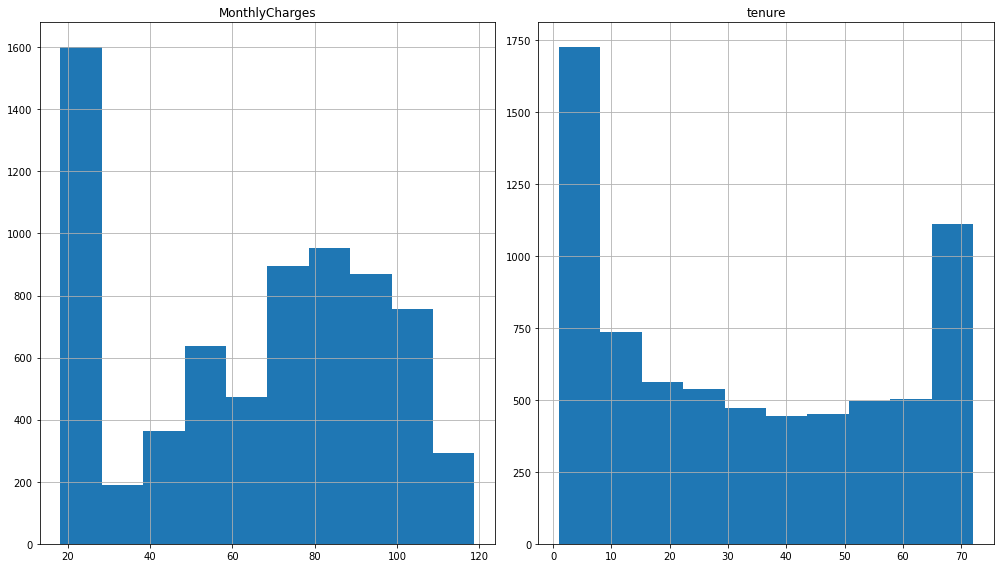

In [111]:
# create histograms of tenure and MonthlyCharges
df_telecom[['MonthlyCharges', 'tenure']].hist(figsize=(14, 8))
plt.tight_layout()
plt.show()

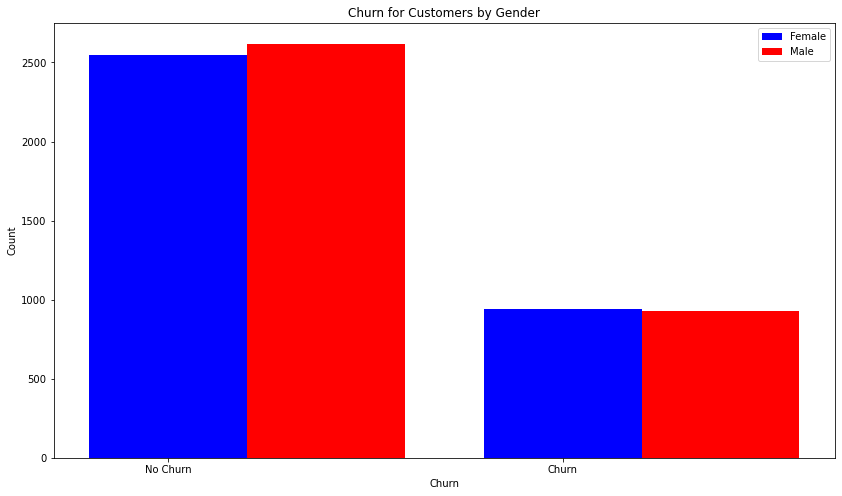

In [112]:
# Filter the data to include only females and males, and the Churn column
gender_df = df_telecom.loc[df_telecom['gender_Female'].isin([1,0]) & df_telecom['gender_Male'].isin([1,0]), ['gender_Female', 'Churn']]

# Group the data by gender and Churn, and count the number of records
gender_churn_counts = gender_df.groupby(['gender_Female', 'Churn']).size().reset_index(name='count')

# Create a bar plot for churn by gender
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the bars for female churn counts
ax.bar(x=[0, 1], height=gender_churn_counts.loc[gender_churn_counts['gender_Female'] == 1]['count'], 
       width=0.4, color='blue', align='edge', label='Female')

# Plot the bars for male churn counts
ax.bar(x=[0.4, 1.4], height=gender_churn_counts.loc[gender_churn_counts['gender_Female'] == 0]['count'], 
       width=0.4, color='red', align='edge', label='Male')

# Set the x-axis labels and title
ax.set_xticks([0.2, 1.2])
ax.set_xticklabels(['No Churn', 'Churn'])
ax.set_xlabel('Churn')
ax.set_ylabel('Count')
ax.set_title('Churn for Customers by Gender')

# Add the legend
ax.legend()

# Display the chart
plt.show()

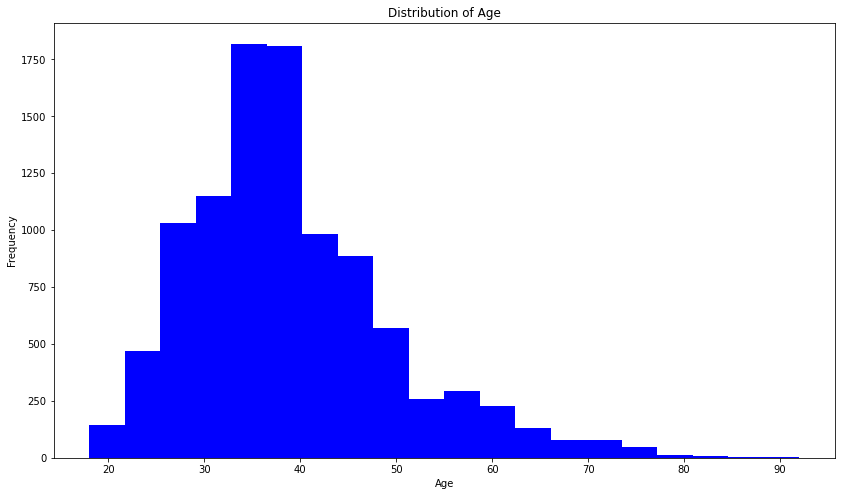

In [113]:
# Create a histogram of age
plt.figure(figsize=(14, 8))
plt.hist(df_bank['age'], bins=20, color='blue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

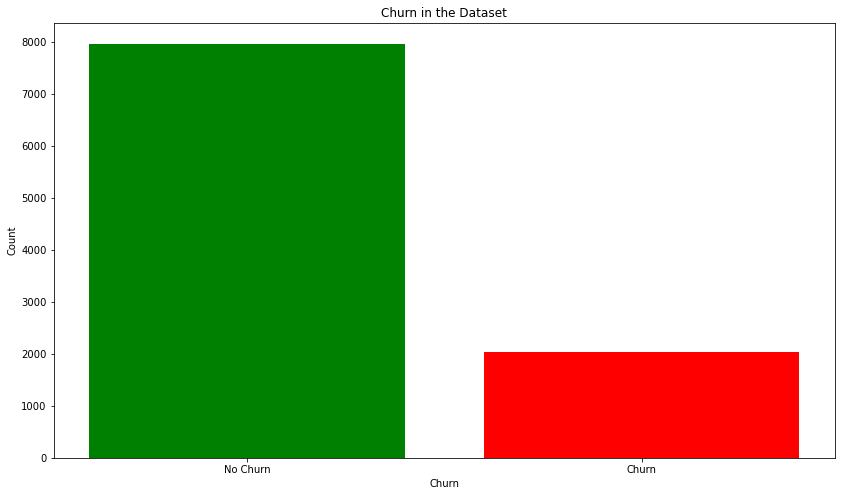

In [114]:
# Group the data by Churn, and count the number of records
churn_counts = df_bank.groupby(['churn']).size().reset_index(name='count')

# Create a bar plot of churn
plt.figure(figsize=(14, 8))
plt.bar(['No Churn', 'Churn'], churn_counts['count'], color=['green', 'red'])
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn in the Dataset')
plt.show()

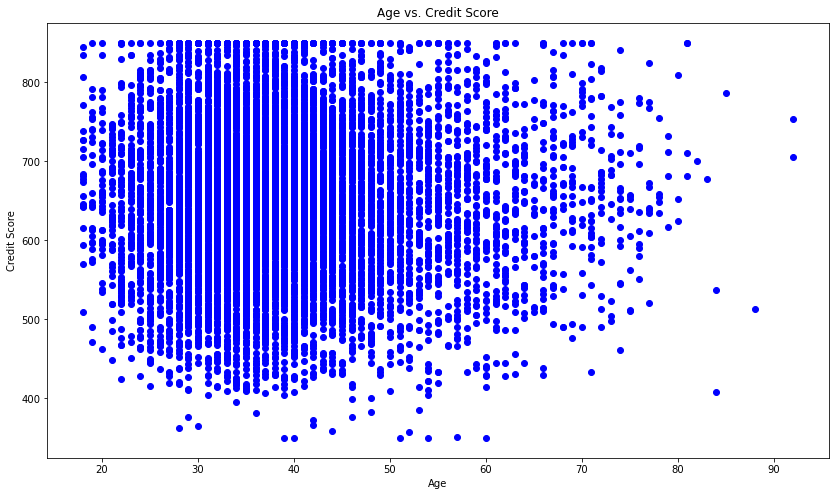

In [115]:
# Create a scatter plot of age vs. credit_score
plt.figure(figsize=(14, 8))
plt.scatter(df_bank['age'], df_bank['credit_score'], color='blue')
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.title('Age vs. Credit Score')
plt.show()

## Build Models: Logistic Regression

### Telecommuncations Dataset

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# create a copy of the dataframe so that the data can be reran easily.
df_telecom_copy = df_telecom.copy()

# split the dataframe into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_telecom_copy.drop('Churn', axis=1), df_telecom_copy['Churn'], test_size=0.2, random_state=42)

# scale the predictor variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train the logistic regression model
clf = LogisticRegression(random_state=42)
clf.fit(X_train_scaled, y_train)

# make predictions on the testing set
y_pred = clf.predict(X_test_scaled)

# evaluate the performance of the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))
print('AUC-ROC score:', roc_auc_score(y_test, clf.predict_proba(X_test_scaled)[:,1]))

Accuracy: 0.7896233120113717
Precision: 0.625
Recall: 0.5213903743315508
F1-score: 0.5685131195335277
AUC-ROC score: 0.8323273162120609


In [104]:
# Get the coefficients of the logistic regression model
coefs = pd.DataFrame(clf.coef_.T, index=X_train.columns, columns=['coef'])
coefs = coefs.sort_values(by='coef', ascending=False)
print(coefs)

                                             coef
TotalCharges                             0.692176
InternetService_Fiber optic              0.368638
Contract_Month-to-month                  0.319266
StreamingMovies_Yes                      0.156574
StreamingTV_Yes                          0.151453
OnlineSecurity_No                        0.121176
TechSupport_No                           0.116333
PaymentMethod_Electronic check           0.112786
MultipleLines_Yes                        0.085553
PaperlessBilling_Yes                     0.069489
DeviceProtection_Yes                     0.063448
Dependents_No                            0.062094
OnlineBackup_No                          0.044174
OnlineBackup_Yes                         0.037767
Partner_Yes                              0.019798
DeviceProtection_No                      0.019657
gender_Female                            0.008101
PhoneService_No                          0.001633
MultipleLines_No phone service           0.001633


Based on the coefficients listed above, we can see that the main columns suspected to predict churn are TotalCharges, InternetService_Fiber_optic, Contract_Month_to_month, StreamingMovies_Yes, and StreamingTV_Yes.  As these values increase, so does the liklihood of the customer to churn.  The AUC-ROC (Area under the ROC curve) is 83.23% which indicates good performance, but the recall score is 52.14%; this indicates that the model can predict churning customers correctly half the time.  

### Banking Dataset

In [106]:
# create a copy of the dataframe to rerun easily.
df_bank_copy = df_bank.copy()

# split the dataframe into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_bank_copy.drop('churn', axis=1), df_bank_copy['churn'], test_size=0.2, random_state=42)

# scale the predictor variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train the logistic regression model
clf = LogisticRegression(random_state=42)
clf.fit(X_train_scaled, y_train)

# make predictions on the testing set
y_pred = clf.predict(X_test_scaled)

# evaluate the performance of the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))
print('AUC-ROC score:', roc_auc_score(y_test, clf.predict_proba(X_test_scaled)[:,1]))

Accuracy: 0.814
Precision: 0.5945945945945946
Recall: 0.16793893129770993
F1-score: 0.2619047619047619
AUC-ROC score: 0.7652968643862491


In [107]:
# Get the coefficients of the logistic regression model
coefs = pd.DataFrame(clf.coef_.T, index=X_train.columns, columns=['coef'])
coefs = coefs.sort_values(by='coef', ascending=False)
print(coefs)

                      coef
age               0.755241
balance           0.308227
gender_Female     0.134424
estimated_salary  0.019534
credit_card      -0.003951
products_number  -0.024642
tenure           -0.040581
credit_score     -0.066367
gender_Male      -0.134424
active_member    -0.534622


Using the same model on the banking dataset, we can see the scores drop significantly for recall and f1-scores.  Since recall is the proportion of true positive predictions out of all actual positive cases, then only 16.8% of actual churn cases were correctly identified as such.  Additionally, since AUC_ROC scores of 0.5 indicates random classification, a score of 76.53% is slightly better than random but requires some improvement.

## Build Models: Decision Trees

### Telecommunications Dataset

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# create a copy of the dataframe so that the data can be reran easily.
df_telecom_copy = df_telecom.copy()

# split the dataframe into training and testing sets
X = df_telecom_copy.drop('Churn', axis=1)
y = df_telecom_copy['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and fit the decision tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# make predictions on the testing set
y_pred = dt.predict(X_test)

# evaluate the performance of the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.7277896233120114
Confusion Matrix:
 [[846 187]
 [196 178]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1033
           1       0.49      0.48      0.48       374

    accuracy                           0.73      1407
   macro avg       0.65      0.65      0.65      1407
weighted avg       0.73      0.73      0.73      1407



Like the logistic regression model used above, the decision tree model appear to have a high accuracy in terms of prediction, but low recall and f1-score for average.  This indicates tthat the model does not predict churn very well, at least for the telecommunications dataset.

### Banking Dataset

In [118]:
# create a copy of the dataframe to rerun easily.
df_bank_copy = df_bank.copy()

# split the dataframe into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_bank_copy.drop('churn', axis=1), df_bank_copy['churn'], test_size=0.2, random_state=42)

# create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# fit the model to the training data
clf.fit(X_train, y_train)

# make predictions on the testing set
y_pred = clf.predict(X_test)

# evaluate the performance of the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.778
Confusion Matrix:
 [[1362  245]
 [ 199  194]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      1607
           1       0.44      0.49      0.47       393

    accuracy                           0.78      2000
   macro avg       0.66      0.67      0.66      2000
weighted avg       0.79      0.78      0.78      2000



Once again, the logistic model actually outperforms the decision tree model for this dataset.  The reduced f1-score and recall values indicate a low chance of acccurately predicting churn (< 50%).  While the accuracy score is high again, this appears to be a red herring.

## Build Models: Random Forest Regression

### Telecommunications Dataset

In [119]:
from sklearn.ensemble import RandomForestClassifier

# create a copy of the dataframe so that the data can be reran easily.
df_telecom_copy = df_telecom.copy()

# Split the dataframe into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_telecom_copy.drop('Churn', axis=1), df_telecom_copy['Churn'], test_size=0.2, random_state=42)

# Create the random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the performance of the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))
print('AUC-ROC score:', roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))

Accuracy: 0.7746979388770433
Precision: 0.5993031358885017
Recall: 0.45989304812834225
F1-score: 0.5204236006051437
AUC-ROC score: 0.808712229061298


Logistic Regression Values for Comparison </br>
Accuracy: 0.7896233120113717 </br>
Precision: 0.625 </br>
Recall: 0.5213903743315508 </br>
F1-score: 0.5685131195335277 </br>
AUC-ROC score: 0.8323273162120609 </br>


When comparing our prediction scores against the logistic regression model, we can see that the random forest regression model is slightly underperformant.  Additional effort should therefore be applied to the first model used to gain a higher rate of accuracy to better predict churning customers.  This holds true for the telecommunications dataset, but let's see what happens for the banking dataset.

### Banking Dataset

In [133]:
# create a copy of the dataframe to rerun easily.
df_bank_copy = df_bank.copy()

# split the dataframe into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_bank_copy.drop('churn', axis=1), df_bank_copy['churn'], test_size=0.2, random_state=42)

# scale the predictor variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train the random forest classifier model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# make predictions on the testing set
y_pred = clf.predict(X_test_scaled)

# evaluate the performance of the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))
print('AUC-ROC score:', roc_auc_score(y_test, clf.predict_proba(X_test_scaled)[:,1]))

Accuracy: 0.8585
Precision: 0.7433628318584071
Recall: 0.42748091603053434
F1-score: 0.5428109854604201
AUC-ROC score: 0.8461232742882205


Logistic Regression Values for Comparison </br>
Accuracy: 0.814 </br>
Precision: 0.5945945945945946 </br>
Recall: 0.16793893129770993 </br>
F1-score: 0.2619047619047619 </br>
AUC-ROC score: 0.7652968643862491 </br>

Interesting.  Unlike the telecommunications dataset, the banking dataset was far more performant with the random forest regression.  Additional tweaks will be required to ensure that the model can reach higher values for recall (the proportion of true positive predictions identified) and the f1-score (the mean of precision and recall).

In [136]:
# Get the highest importants of each column.
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importance ranking:")
for f in range(X_train_scaled.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

Feature importance ranking:
1. age (0.245408)
2. estimated_salary (0.158674)
3. credit_score (0.157450)
4. balance (0.142657)
5. products_number (0.132474)
6. tenure (0.085348)
7. active_member (0.041884)
8. credit_card (0.018926)
9. gender_Female (0.008775)
10. gender_Male (0.008404)


## Data Analysis

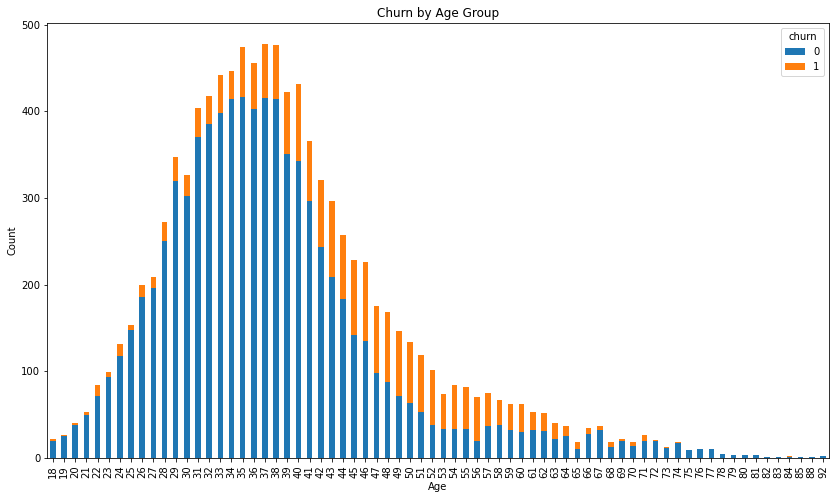

In [138]:
# VIew group by age for banking data.
age_group = df_bank.groupby('age')

age_group_counts = age_group['churn'].value_counts().unstack()
age_group_counts.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Churn by Age Group')
plt.show()

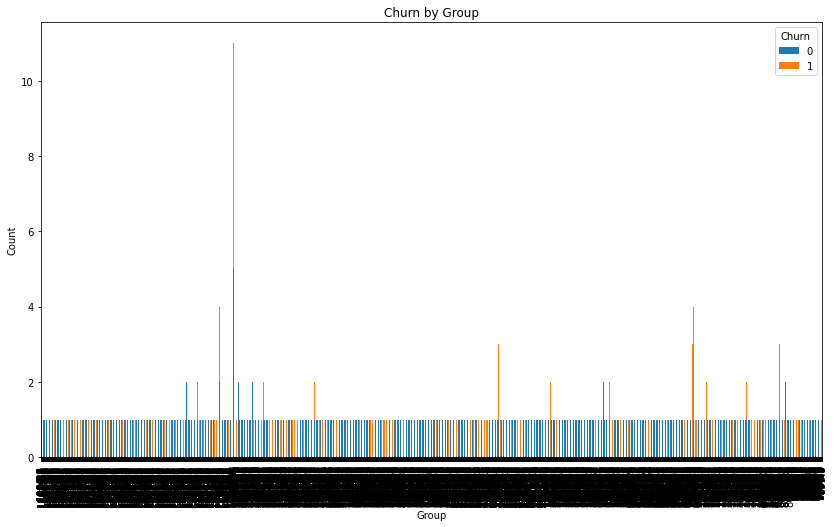

In [165]:
# Veiw by grouping for telecommunications data
df_telecom_partial = df_telecom[['TotalCharges', 'Churn']]
telecom_group = df_telecom_partial.groupby(['TotalCharges'])

churn_by_group = telecom_group['Churn'].value_counts().unstack()
churn_by_group.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.xlabel('Group')
plt.ylabel('Count')
plt.title('Churn by Group')
plt.show()